# <h1>DATA PREPARATION LAB </h1>

In [73]:
#étape 1: importation des bibiliothèques necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import isnan
import seaborn as sns
import statsmodels as stat
import scipy as scp
from  category_encoders  import  *
import category_encoders as ce
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression, SelectKBest

<h2> créer un data frame et obtenir les informations </h2>

In [65]:
#étape 2: importer le fichier
df=pd.read_excel('AgencyDataset.xlsx')


In [3]:
#! pip install --upgrade category_encoders

In [66]:
#étape 3: information sur la data
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
df.shape

(4600, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [7]:
df.describe()
#df.dtypes()
#df.columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [39]:
#séparer les colonnes numériques des colonnes catégorielles

# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
numeric_cols

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated'], dtype=object)

In [9]:
# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
df_non_numeric

,date,street,city,statezip,country
0,2014-05-02,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...
4595,2014-07-09,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,5148 S Creston St,Seattle,WA 98178,USA


<h3>data cleaning</h3>

In [10]:
#checker les valeurs nulles
df.isnull().values.any()

False

In [11]:
df.notnull().values.any()

True

In [12]:
df.isna().sum().sum()

0

In [13]:
#checker les colonnes en double

# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country]
Index: []


(array([   1,  122,  252,  404,  462,  581,  745, 1132, 1209, 1543, 1567,
       1571, 1600, 1637, 1858, 1911, 2083, 2286, 2328, 2364, 2654, 2711,
       2712, 2761, 2772, 2846, 2978, 2980, 3058, 3202, 3284, 3699, 3729,
       3781, 3791, 3863, 3873, 3959, 4135, 4143, 4261, 4273, 4346, 4347,
       4348, 4350, 4465], dtype=int64),)


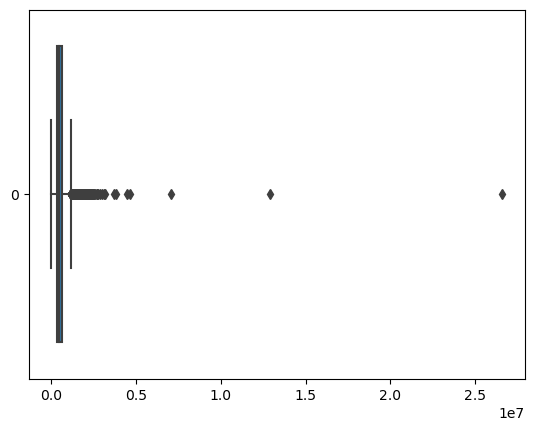

In [14]:
#recherche des valeurs aberrantes
sns.boxplot(data=df['price'], orient="h")
print(np.where(df['price']>0.2e7))

(array([  92,  122,  170,  241,  252,  284,  291,  356,  372,  567,  575,
        743,  956,  980,  986, 1017, 1125, 1158, 1182, 1427, 1455, 1463,
       1467, 1479, 1500, 1527, 1567, 1602, 1644, 1812, 1876, 1911, 1951,
       2075, 2194, 2264, 2279, 2280, 2443, 2576, 2596, 2692, 2717, 2731,
       2775, 2847, 2878, 2917, 2967, 2980, 2998, 3004, 3046, 3048, 3055,
       3109, 3198, 3317, 3335, 3370, 3419, 3437, 3569, 3721, 3911, 3950,
       3981, 3987, 4143, 4183, 4204, 4243, 4287, 4301, 4341, 4357, 4509,
       4572], dtype=int64),)
(array([ 122,  143,  227,  241,  252,  291,  309,  418,  452,  462,  471,
        548,  606,  634,  677,  736,  839, 1017, 1132, 1182, 1209, 1302,
       1357, 1360, 1411, 1479, 1567, 1584, 1644, 1755, 1911, 1951, 1952,
       1962, 1974, 2005, 2261, 2279, 2286, 2328, 2364, 2634, 2654, 2717,
       2731, 2772, 2841, 2846, 2967, 2973, 2980, 3004, 3202, 3283, 3346,
       3559, 3577, 3609, 3661, 3729, 3770, 3781, 3888, 3894, 3939, 3959,
       4135, 4174, 4

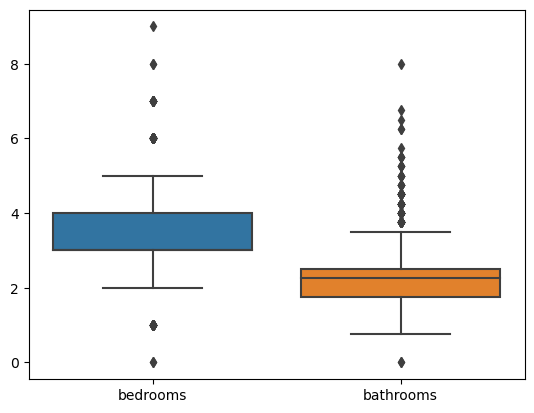

In [15]:
sns.boxplot(data=df[[ 'bedrooms', 'bathrooms']])
print(np.where(df['bedrooms']>5))
print(np.where(df['bathrooms']>4))

(array([   0,    1,    2, ..., 4597, 4598, 4599], dtype=int64),)
(array([  56,  107,  122,  170,  233,  240,  254,  262,  263,  272,  375,
        444,  449,  461,  462,  471,  479,  484,  495,  679,  747,  779,
        798,  878,  879,  999, 1031, 1078, 1103, 1123, 1182, 1261, 1265,
       1272, 1275, 1390, 1406, 1408, 1424, 1539, 1579, 1722, 1762, 1786,
       1944, 1962, 2056, 2109, 2152, 2155, 2157, 2199, 2300, 2358, 2446,
       2480, 2541, 2551, 2588, 2604, 2731, 2855, 2872, 2881, 2889, 2967,
       2968, 3056, 3099, 3122, 3175, 3211, 3260, 3346, 3353, 3402, 3448,
       3470, 3487, 3512, 3525, 3660, 3671, 3700, 3724, 3972, 3980, 4032,
       4060, 4061, 4088, 4138, 4234, 4266, 4283, 4286, 4353, 4369, 4374,
       4387, 4456], dtype=int64),)


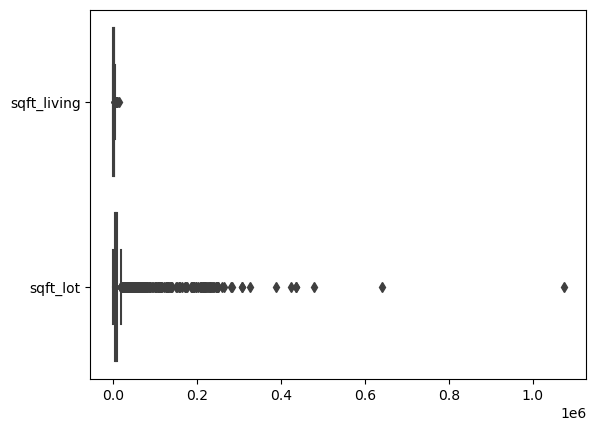

In [16]:
sns.boxplot(data=df[['sqft_living', 'sqft_lot']], orient="h")
print(np.where(df['sqft_living']>0e6))
print(np.where(df['sqft_lot']>0.1e6))

(array([ 107,  122,  217,  233,  252,  388,  418,  462,  578,  581,  634,
        675,  965, 1089, 1128, 1182, 1202, 1209, 1239, 1265, 1272, 1275,
       1301, 1302, 1345, 1360, 1411, 1417, 1543, 1555, 1567, 1571, 1629,
       1644, 1722, 1761, 1952, 1962, 2005, 2073, 2109, 2226, 2286, 2316,
       2326, 2328, 2333, 2361, 2401, 2434, 2440, 2446, 2551, 2654, 2672,
       2725, 2731, 2761, 2846, 2967, 2980, 3002, 3004, 3058, 3117, 3125,
       3202, 3209, 3235, 3284, 3346, 3349, 3389, 3418, 3559, 3574, 3695,
       3699, 3729, 3770, 3775, 3787, 3863, 3894, 3906, 3939, 3958, 4032,
       4061, 4135, 4138, 4174, 4202, 4233, 4261, 4273, 4277, 4283, 4383,
       4389, 4400, 4428, 4432, 4467, 4472, 4545, 4567, 4575], dtype=int64),)
(array([ 122,  839,  847,  970,  995, 1182, 1463, 1479, 1518, 1527, 1602,
       1637, 1728, 1792, 1874, 1936, 2057, 2060, 2093, 2286, 2328, 2654,
       2713, 2846, 2967, 3202, 3491, 3724, 3729, 4086, 4091, 4204, 4416,
       4528], dtype=int64),)


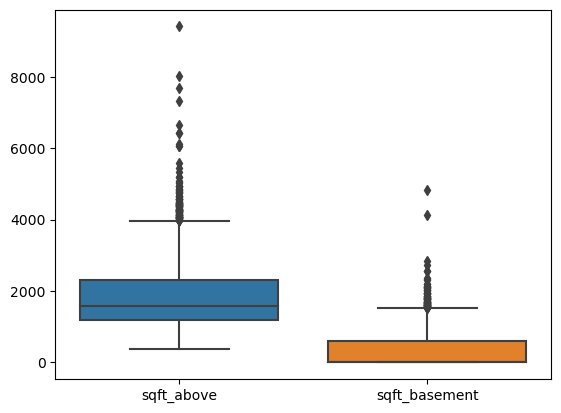

In [17]:
sns.boxplot(data=df[['sqft_above',
       'sqft_basement']])
print(np.where(df['sqft_above']> 4000))
print(np.where(df['sqft_basement']> 1800))

<AxesSubplot:>

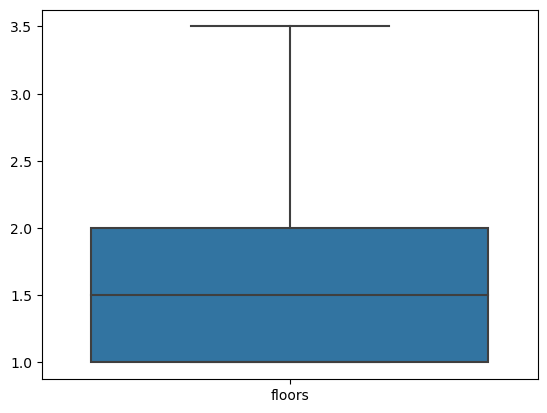

In [18]:
sns.boxplot(data=df[[ 'floors']])

<AxesSubplot:>

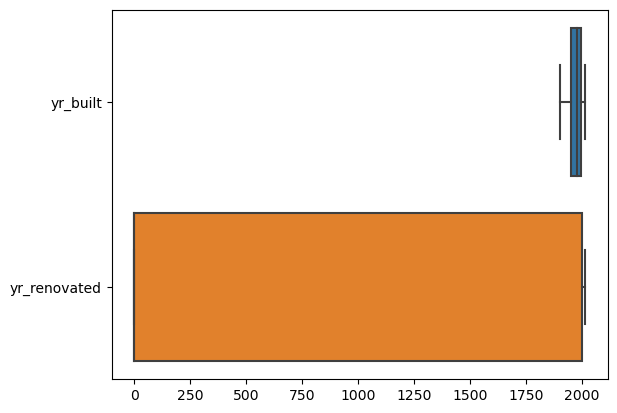

In [19]:
sns.boxplot(data=df[['yr_built', 'yr_renovated']],orient="h" )

In [20]:
#nous allons passer à l'encodage des données categorielles#
#! pip install --upgrade category_encoders

In [21]:
display(df['street'].value_counts())

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

ici on utilise un encodegae base 9 car nous avons 4525 valeurs uniques et 
nous devons éviter de nous retrouver avec deux mêmes valeurs lors de l'encodage

In [22]:
encoderStreet= ce.BaseNEncoder(cols=['street'],return_df=True,base=9)

In [23]:
df_non_numeric=encoderStreet.fit_transform(df_non_numeric)
df_non_numeric

,date,street_0,street_1,street_2,street_3,city,statezip,country
0,2014-05-02,0,0,0,1,Shoreline,WA 98133,USA
1,2014-05-02,0,0,0,2,Seattle,WA 98119,USA
2,2014-05-02,0,0,0,3,Kent,WA 98042,USA
3,2014-05-02,0,0,0,4,Bellevue,WA 98008,USA
4,2014-05-02,0,0,0,5,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...
4595,2014-07-09,6,1,7,3,Seattle,WA 98133,USA
4596,2014-07-09,6,1,7,4,Bellevue,WA 98007,USA
4597,2014-07-09,6,1,7,5,Renton,WA 98059,USA
4598,2014-07-10,6,1,7,6,Seattle,WA 98178,USA


In [24]:
display(df['city'].value_counts())

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [25]:
len(df['city'].unique())

44

nous avons donc 44 valeurs uniques nous pouvons les encoder avec une base 3 soit 3^4=81

In [26]:
encoderCity=  ce.BaseNEncoder(cols=['city'],return_df=True,base=3)

In [27]:
df_non_numeric=encoderCity.fit_transform(df_non_numeric) 
df_non_numeric

,date,street_0,street_1,street_2,street_3,city_0,city_1,city_2,city_3,statezip,country
0,2014-05-02,0,0,0,1,0,0,0,1,WA 98133,USA
1,2014-05-02,0,0,0,2,0,0,0,2,WA 98119,USA
2,2014-05-02,0,0,0,3,0,0,1,0,WA 98042,USA
3,2014-05-02,0,0,0,4,0,0,1,1,WA 98008,USA
4,2014-05-02,0,0,0,5,0,0,1,2,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,6,1,7,3,0,0,0,2,WA 98133,USA
4596,2014-07-09,6,1,7,4,0,0,1,1,WA 98007,USA
4597,2014-07-09,6,1,7,5,0,2,0,1,WA 98059,USA
4598,2014-07-10,6,1,7,6,0,0,0,2,WA 98178,USA


In [28]:
display(df['statezip'].value_counts())

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [29]:
len(df['statezip'].unique())

77

In [30]:
encoderStz=  ce.BaseNEncoder(cols=['statezip'],return_df=True,base=3)

In [31]:
df_non_numeric=encoderStz.fit_transform(df_non_numeric) 
df_non_numeric

,date,street_0,street_1,street_2,street_3,city_0,city_1,city_2,city_3,statezip_0,statezip_1,statezip_2,statezip_3,country
0,2014-05-02,0,0,0,1,0,0,0,1,0,0,0,1,USA
1,2014-05-02,0,0,0,2,0,0,0,2,0,0,0,2,USA
2,2014-05-02,0,0,0,3,0,0,1,0,0,0,1,0,USA
3,2014-05-02,0,0,0,4,0,0,1,1,0,0,1,1,USA
4,2014-05-02,0,0,0,5,0,0,1,2,0,0,1,2,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,6,1,7,3,0,0,0,2,0,0,0,1,USA
4596,2014-07-09,6,1,7,4,0,0,1,1,0,1,1,1,USA
4597,2014-07-09,6,1,7,5,0,2,0,1,1,0,2,2,USA
4598,2014-07-10,6,1,7,6,0,0,0,2,2,1,1,0,USA


In [54]:
data_non_numerics_clean= df_non_numeric.iloc[:,1:15]
data_non_numerics_clean

,street_0,street_1,street_2,street_3,city_0,city_1,city_2,city_3,statezip_0,statezip_1,statezip_2,statezip_3,country
0,0,0,0,1,0,0,0,1,0,0,0,1,USA
1,0,0,0,2,0,0,0,2,0,0,0,2,USA
2,0,0,0,3,0,0,1,0,0,0,1,0,USA
3,0,0,0,4,0,0,1,1,0,0,1,1,USA
4,0,0,0,5,0,0,1,2,0,0,1,2,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,6,1,7,3,0,0,0,2,0,0,0,1,USA
4596,6,1,7,4,0,0,1,1,0,1,1,1,USA
4597,6,1,7,5,0,2,0,1,1,0,2,2,USA
4598,6,1,7,6,0,0,0,2,2,1,1,0,USA


Nous allons par la suite passer par la normalisation et la standardisation afin de travailler avec des variables de même echelle

In [32]:
#instanciation 
sc = StandardScaler()
#Normalization
Z = sc.fit_transform(df_numeric)
print(Z)

[[-0.42386353 -0.44112227 -0.84320364 ... -0.67246372 -0.53101376
   1.22167046]
 [ 3.2495981   1.75970468  0.43280154 ... -0.06912828 -1.67469295
  -0.82569345]
 [-0.37242442 -0.44112227 -0.20520105 ... -0.67246372 -0.1609999
  -0.82569345]
 ...
 [-0.23956224 -0.44112227  0.43280154 ... -0.67246372  1.2854179
  -0.82569345]
 [-0.61826787  0.6592912  -0.20520105 ...  1.5254011   0.10810108
  -0.82569345]
 [-0.58775916 -0.44112227  0.43280154 ... -0.67246372  0.64630305
  -0.82569345]]


In [33]:
scaler = MinMaxScaler(feature_range=(0,1))
df_normalized=scaler.fit_transform(Z)

In [35]:
#data=pd.concat([df_normalized, df_non_numeric], axis = 1)

In [38]:
type(df_normalized)

numpy.ndarray

In [43]:
data_numerics_clean = pd.DataFrame(df_normalized,  columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated'])
data_numerics_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531
1,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000
2,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000
3,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000
4,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.011590,0.333333,0.21875,0.086560,0.005330,0.0,0.0,0.0,0.75,0.126106,0.000000,0.473684,0.982622
4596,0.020095,0.333333,0.31250,0.082764,0.006460,0.4,0.0,0.0,0.50,0.120575,0.000000,0.728070,0.997517
4597,0.015679,0.333333,0.31250,0.200456,0.005939,0.4,0.0,0.0,0.50,0.292035,0.000000,0.956140,0.000000
4598,0.007649,0.444444,0.25000,0.130600,0.005581,0.0,0.0,0.0,0.50,0.077434,0.211618,0.649123,0.000000


In [99]:
data_clean= pd.concat([data_numerics_clean, data_non_numerics_clean], axis = 1)
data_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,street_3,city_0,city_1,city_2,city_3,statezip_0,statezip_1,statezip_2,statezip_3,country
0,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,...,1,0,0,0,1,0,0,0,1,USA
1,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,...,2,0,0,0,2,0,0,0,2,USA
2,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,...,3,0,0,1,0,0,0,1,0,USA
3,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,...,4,0,0,1,1,0,0,1,1,USA
4,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,...,5,0,0,1,2,0,0,1,2,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.011590,0.333333,0.21875,0.086560,0.005330,0.0,0.0,0.0,0.75,0.126106,...,3,0,0,0,2,0,0,0,1,USA
4596,0.020095,0.333333,0.31250,0.082764,0.006460,0.4,0.0,0.0,0.50,0.120575,...,4,0,0,1,1,0,1,1,1,USA
4597,0.015679,0.333333,0.31250,0.200456,0.005939,0.4,0.0,0.0,0.50,0.292035,...,5,0,2,0,1,1,0,2,2,USA
4598,0.007649,0.444444,0.25000,0.130600,0.005581,0.0,0.0,0.0,0.50,0.077434,...,6,0,0,0,2,2,1,1,0,USA


In [102]:
data_clean.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street_0         0
street_1         0
street_2         0
street_3         0
city_0           0
city_1           0
city_2           0
city_3           0
statezip_0       0
statezip_1       0
statezip_2       0
statezip_3       0
country          0
dtype: int64

In [78]:
#feature selection
array = data_clean.values
X = array[:,1:25]
Y = array[:,0]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# Pourcentage de la variance expliquée par chacune des composantes sélectionnées.
print("---------------------------------------------------------------")
print(pca.singular_values_) # Valeurs de variance
print("---------------------------------------------------------------")
print(pca.explained_variance_ratio_) #  Pourcentages
print("---------------------------------------------------------------")
print(pca.components_) # 
PCAdata=pca.fit_transform(X)
# Bruit estimé lié à la covariance
print("---------------------------------------------------------------")
print(pca.noise_variance_)

---------------------------------------------------------------
[178.12414944 175.38792155 174.66530308]
---------------------------------------------------------------
[0.24615222 0.23864784 0.23668538]
---------------------------------------------------------------
[[-4.13404746e-04  8.50382113e-06 -3.29044704e-04  2.98941510e-04
  -1.04328180e-03 -1.02755645e-04 -8.06135979e-04 -2.36050738e-03
  -4.14027580e-05 -8.21418634e-04  2.78475993e-03 -3.69502212e-03
  -1.08109149e-01  9.92789124e-01  3.97840203e-02  1.41593725e-02
   2.37140986e-03  1.61707250e-02  2.98029506e-03 -3.26644233e-03
   2.36346790e-02  1.32126986e-03 -3.58762289e-03  3.04221815e-03]
 [-1.23061093e-03  6.58519575e-04 -3.64291834e-04 -1.21624862e-04
   2.40563719e-03  5.10140288e-05 -9.42095019e-04 -1.81273968e-03
  -5.23888585e-04 -1.28154877e-05  3.22611112e-03 -4.12657434e-03
  -4.71896793e-03 -1.94897137e-02  7.23060668e-01 -6.90329805e-01
  -4.26360211e-04 -2.12511336e-03 -3.44558597e-03  9.33106224e-03
  -3.

In [98]:
# ALGORITHME DE FEATURE CLEANNING
df.isnone()

AttributeError: 'DataFrame' object has no attribute 'isnone'

<AxesSubplot:>

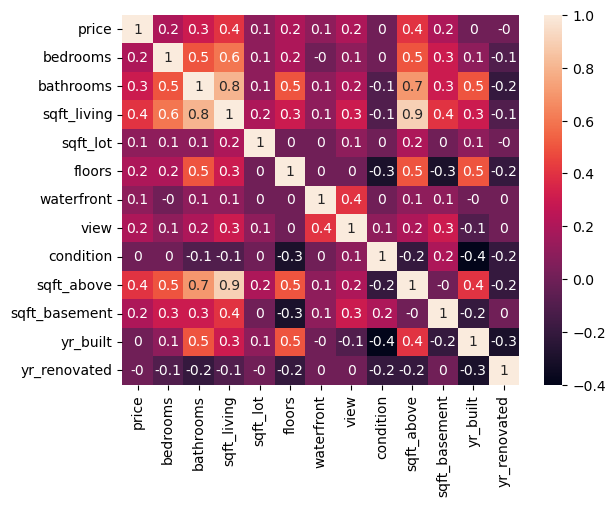

In [97]:
#etude de la correlation
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

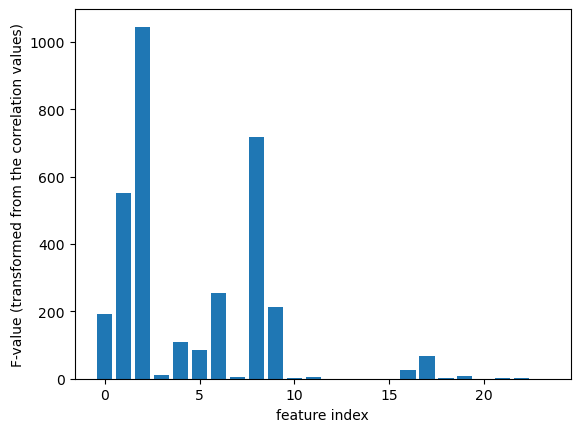

In [115]:
#SELET K-BEST : algorithme basé sur les tests de dépendances(selectionne les k variables x dont le test de corrélation avec y est le plus élévé)
array = data_clean
X = array.iloc[:,1:25]
y = array.iloc[:,0]
# feature selection
f_selector = SelectKBest(score_func=f_regression, k=18)
# learn relationship from training data
f_selector.fit_transform(X,y)
# transform train input data
#X_fs = f_selector.transform(X)
# Plot the scores for the features

# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()




In [116]:
f_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True, False,  True,  True, False])

In [ ]:
#feature selection
from sklearn.feature_selection import SelectKBest, chi2
test=SelectKBest(score_func=chi2, k=10)
fit=test.fit(X, y)
fit.scores_
x_new=test.fit_transform(X,y)
x_new.shape
X.columns[fit.get_support()]